# Estrazione dei dati

## Descrizione del dataset

Abbiamo a disposizione due dataset:
- campioni positivi (dove c'è sicuramente un pedone)
- campioni negativi (dove invece il pedone non c'è)

Questi campioni sono organizzati in 3 insiemi disgiunti:
- Train Set
- Test Set
- Validation Set

Il nostro compito è quello di estrarre le immaggini di train, test e set per ogni campione positivo e negativo e creare per ogni immagine un "mapping" tale per cui assegniamo classe 1 o 0 se il pedone c'è o no.

In [1]:
# import delle librerie
import cv2
import numpy as np

## Campioni Positivi

Per quanto riguarda i campioni positivi, ogni immagine è "descritta" da delle boundary boxes che ci dicono dove si trovano i pedoni e a quale classe di pedone appartiene quella boundary box. A noi tuttavia interesserà sapere quelle appartenenti alla classe 1.

Per leggere le informazioni su queste boundary boxes prima devo leggere quali sono le "immagini" da tenere conto per ogni insieme (test, train e validation), ovvero devo prendere SOLO le boundary boxes delle annotations dei seguenti file txt:
- test_assignment.txt
- train_assignment.txt
- val_assignment.txt

Tuttavia, dal file di readMe leggiamo come ogni file di annotazione per ogni immagine è del tipo:

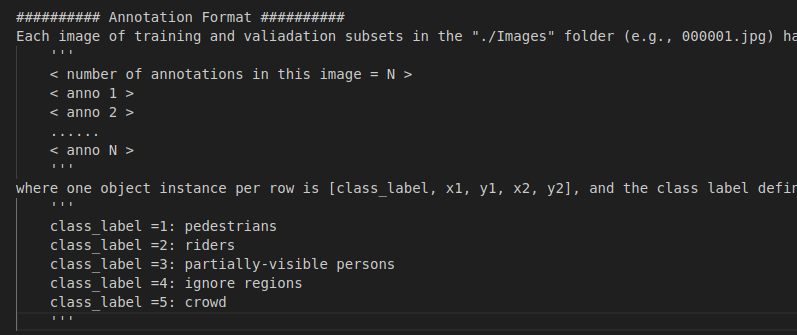

I tre file di test_assignment, train e val servono per capire quali 'immagini' considerare, quindi per quali immagini estrarre le boundary boxes dal corrispondente file di annotazione

In [2]:
def assign_sets():
    '''
    Questa funzione legge dalla cartella i seguenti file:
    - test_assignment.txt
    - train_assignment.txt
    - val_assignment.txt
    Poi ritorna tre array di valori per ogni categoria di set contente le annotazioni da vedere
    '''
    test_set = []
    train_set = []
    val_set = []
    # leggo prima Train
    with open('train_assignment.txt', 'r') as f:
        for row in f:
            row = row.strip()
            train_set.append(row)
    # poi test
    with open('test_assignment.txt', 'r') as f:
        for row in f:
            row = row.strip()
            test_set.append(row)
    # infine validation
    with open('val_assignment.txt', 'r') as f:
        for row in f:
            row = row.strip()
            val_set.append(row)
    
    print(f'Train set: {len(train_set)}')
    print(f'Test set: {len(test_set)}')
    print(f'Val set: {len(val_set)}')
    return train_set, test_set, val_set

In [3]:
def extract_boundary_box(valore, annotations):
    '''
    Questa funzione prende un valore in input, ovvero l'immagine dove cercare
    ed estrae le boundary box della classe 1 relative a quel valore.
    '''
    path_file = 'Annotations/' + valore + '.jpg.txt'
    # print(path_file)
    rows = []
    if path_file[12:] in annotations:
        # il file è presente in Annotations
        with open(path_file, 'r') as f:
            for row in f:
                row = row.strip()
                rows.append(row)
        rows = rows[1:] # faccio slicings
        bboxes = []
        for row in rows:
            row = row.split(' ')
            target,x,y,w,h = row
            if int(target) == 1:
                box = [x,y,w,h]
                bboxes.append(box)
        # print(f'Ho trovato {len(bboxes)} boundary boxes')
        return bboxes
    return None

Tuttavia dobbiamo prima di tutto 'esportare' i file da cui dobbiamo leggere

In [4]:
import os
directory = 'Annotations'
annotations = []
for root,dirs,files in os.walk(directory):
    for file in files:
        annotations.append(str(file))

In [5]:
annotations[0]

'012105.jpg.txt'

In [6]:
# creo i set
train, test, val = assign_sets()

positive_bboxes_train = []
for i in range(len(train)):
    bboxes = extract_boundary_box(train[i], annotations)
    if bboxes:
        # aggiungo alle Boundary Box anche il nome dell'immagine dove andare a cercare
        positive_bboxes_train.append((train[i], bboxes))

positive_bboxes_test = []
for i in range(len(test)):
    bboxes = extract_boundary_box(test[i], annotations)
    if bboxes:
        # aggiungo alle Boundary Box anche il nome dell'immagine dove andare a cercare
        positive_bboxes_test.append([test[i], bboxes])

positive_bboxes_val = []
for i in range(len(val)):
    bboxes = extract_boundary_box(val[i], annotations)
    if bboxes:
        # aggiungo alle Boundary Box anche il nome dell'immagine dove andare a cercare
        positive_bboxes_val.append([val[i], bboxes])


print(f'Ci sono in totale {len(positive_bboxes_train)} file di annotazioni per il train')
print(f'Ci sono in totale {len(positive_bboxes_test)} file di annotazioni per il test')
print(f'Ci sono in totale {len(positive_bboxes_val)} file di annotazioni per il validation')

Train set: 7000
Test set: 1000
Val set: 1000


Ci sono in totale 6919 file di annotazioni per il train
Ci sono in totale 983 file di annotazioni per il test
Ci sono in totale 991 file di annotazioni per il validation


In questo modo metto in evidenza l'immagine da cercare e le boundary box associate

In [7]:
positive_bboxes_train[0]

('000040',
 [['45', '235', '79', '318'],
  ['60', '209', '120', '356'],
  ['119', '214', '168', '336'],
  ['94', '220', '136', '326'],
  ['213', '201', '287', '381'],
  ['268', '201', '339', '378'],
  ['312', '192', '389', '380'],
  ['374', '226', '391', '267'],
  ['417', '225', '438', '279'],
  ['428', '222', '446', '266'],
  ['443', '224', '456', '258'],
  ['449', '227', '467', '271'],
  ['396', '217', '406', '241'],
  ['402', '210', '413', '238'],
  ['409', '217', '419', '241'],
  ['531', '222', '550', '287'],
  ['527', '217', '538', '245'],
  ['511', '213', '522', '240'],
  ['515', '211', '525', '237'],
  ['491', '216', '502', '243'],
  ['484', '209', '494', '235'],
  ['473', '211', '483', '235'],
  ['477', '211', '487', '236'],
  ['468', '212', '476', '235'],
  ['461', '210', '471', '236'],
  ['456', '212', '466', '240'],
  ['448', '209', '459', '237'],
  ['439', '210', '450', '237'],
  ['431', '211', '442', '241'],
  ['420', '213', '432', '242']])

In [8]:
directory_p = 'Images_Positive'

images_positive = []
for root,dirs,files in os.walk(directory_p):
    for file in files:
        images_positive.append(str(file))

print(f'Ci sono {len(annotations)} annotazioni per le boundary box')
print(f'Ci sono {len(images_positive)} immagini di campioni positivi')

Ci sono 8918 annotazioni per le boundary box
Ci sono 13259 immagini di campioni positivi


Ogni boundary box va letta come:[x,y,w,h], dove:
- x,y: coordinate del rettangolo in alto a sx dove inizia la boundary box
- w: larghezza (quindi x 'finale')
- h: altezza (quindi y 'finale')

L'idea è quella di usare il primo valore per 'aprire' l'immagine, poi usare le boundary box per fare slicing delle foto, quindi applicare il descrittore HOG ad ognuno di loro. 

Alla fine, dopo aver aperto l'immagine e aver calcolato il descrittore su ogni campione positivo, otterrò un vettore di label positive del tipo (descrittore, 1)

Definisco innanzitutto il descrittore HOG, utilizzando i parametri di Default e la dimensione della finestra fissata a h=128, w=64 pixel. Dalla documentazione vediamo che questi sono i valori di default.
Inoltre, per il momento, addestriamo il nostro descrittore su un modello di Default di OpenCV

### Descrittore HOG

#### Descrittore HOG

cv2.HOGDescriptor(
  
                win_size=(64, 128),
                block_size=(16, 16),
                block_stride=(8, 8),
                cell_size=(8, 8),
                nbins=9,
                win_sigma=DEFAULT_WIN_SIGMA,
                threshold_L2hys=0.2,
                gamma_correction=true,
                nlevels=DEFAULT_NLEVELS
                
              )

- win_size: dimensione della finestra di rilevamento in pixel (larghezza, altezza). Definisce la regione di interesse. Deve essere un multiplo intero della dimensione della cella.

- block_size: dimensione del blocco in pixel (larghezza, altezza). Definisce quante celle sono presenti in ciascun blocco. Deve essere un multiplo intero della dimensione della cella e deve essere inferiore alla finestra di rilevamento. Più piccolo è il blocco, maggiori saranno i dettagli che otterrai.

- block_stride: blocca il passo in pixel (orizzontale, verticale). Deve essere un multiplo intero della dimensione della cella. Il block_stride definisce la distanza tra i blocchi adiacenti, ad esempio, 8 pixel in orizzontale e 8 pixel in verticale. Block_strides più lunghi rendono l'algoritmo più veloce (perché vengono valutati meno blocchi) ma l'algoritmo potrebbe non funzionare altrettanto bene.

- cell_size: dimensione della cella in pixel (larghezza, altezza). Determina la dimensione della tua cella. Più piccola è la cella, più dettagli otterrai.

- nbins: numero di bin per gli istogrammi. Determina il numero di contenitori angolari utilizzati per creare gli istogrammi. Con più contenitori catturi più direzioni del gradiente. HOG utilizza gradienti senza segno, quindi i contenitori angolari avranno valori compresi tra 0 e 180 gradi.

- win_sigma: parametro della finestra di livellamento gaussiano. Le prestazioni dell'algoritmo HOG possono essere migliorate smussando i pixel vicino ai bordi dei blocchi applicando una finestra spaziale gaussiana a ciascun pixel prima di calcolare gli istogrammi.

- soglia_L2hys: ritiro del metodo di normalizzazione L2-Hys (norma L2 ritagliata in stile Lowe). Il metodo L2-Hys viene utilizzato per normalizzare i blocchi e consiste in una norma L2 seguita da ritaglio e rinormalizzazione. Il ritaglio limita il valore massimo del vettore descrittore per ciascun blocco in modo che abbia il valore della soglia specificata (0,2 per impostazione predefinita).

- gamma_correction: flag per specificare se è richiesta o meno la preelaborazione della correzione gamma. L'esecuzione della correzione gamma aumenta leggermente le prestazioni dell'algoritmo HOG.

- nlevels: aumenta il numero massimo di finestre di rilevamento.

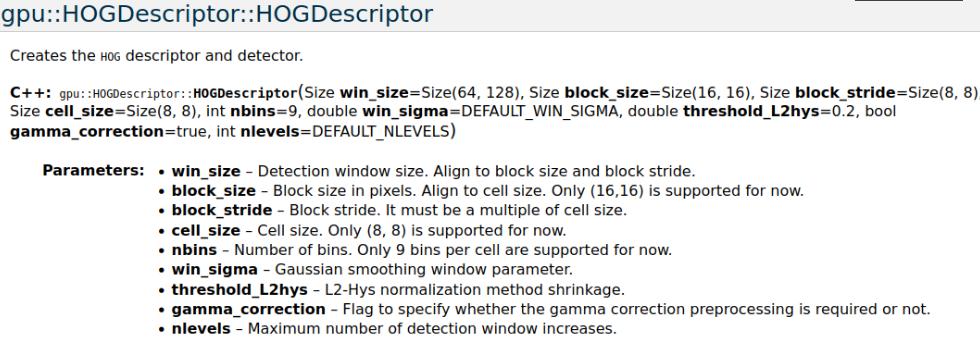

In [36]:
# Specify the parameters for our HOG descriptor
win_size = (64, 128)
cell_size = (8, 8)
block_size = (16, 16)
block_stride = (8, 8)
num_bins = 9

# Set the parameters of the HOG descriptor using the variables defined above
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

### Estrazione dei campioni positivi

Definisco una funzione che, presa un elemento da un set (train, test o val):
- estrare le boundary boxes
- per ognuna di essere ritorna un descrittore

La funzione dovrà tornare quindi una lista di descrittori che useremo per costruire l'esempio di campioni positivi

In [10]:
images_positive[0]

'016530.jpg'

In [11]:
def extract_subset_bbox(valore):
    '''
    Presa in input l'immagine da 'analizzare', estraggo le boundary boxes e faccio slicing
    '''
    image_path, bboxes = valore
    if (f'{image_path}.jpg' in images_positive):
        image = cv2.imread(f'Images_Positive/{image_path}.jpg')
        sub_images = []
        for bbox in bboxes:
            # faccio il casting degli interi
            for i in range(len(bbox)):
                bbox[i] = int(bbox[i])
            x,y,w,h = bbox
            if w != x and h != y:
                # evito boundary box false
                sub_image = image[y:h, x:w].copy()
                # cv2.imshow(f'Boundary Box: {bbox}', sub_image)
                # cv2.waitKey(0)
                sub_images.append(sub_image)
        # cv2.destroyAllWindows()
        return sub_images
    return []

In [12]:
bboxes_0_example = extract_subset_bbox(positive_bboxes_train[0])
len(extract_subset_bbox(positive_bboxes_train[0])) == len(positive_bboxes_train[0][1])
# la dimensione corrisponde

True

#### Funzione di image processing

Realizzo anche una funzione di image proccessing per fare in modo che ogni immagine croppata dalla funzione precedente venga riscalata a 64x128 pixel e:
- prima viene convertita in scala di grigi
- eventualmente faccio equilizzazione dei colori per portarli tutti a livelli di contrasto e luminanza identici
- poi applico un filtro gaussiano
- infine faccio resize dell'immagine

In [34]:
def subimage_processing(img):
    # faccio conversione in scala di grigi
    # cv2.imshow('Immagine originale', img)
    # cv2.waitKey(0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # poi applico una equilizzazione
    img = cv2.equalizeHist(img)
    # cv2.imshow('Immagine equilizzata', img)
    # cv2.waitKey(0)
    # quindi applico un filtro gaussiano er ridurre eventuale rumore
    img = cv2.GaussianBlur(img,(3,3),0) # kernel size = 3x3, sigma_x = 0
    # cv2.imshow('Immagine con filtro', img)
    # cv2.waitKey(0)
    # infine faccio reshape
    img = cv2.resize(img, (64, 128))  # Larghezza x Altezza
    # cv2.imshow('Immagine con reshape', img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return img

Come si applicano i descrittori?

In [14]:
subimages = extract_subset_bbox(positive_bboxes_train[0])
descriptors = [] # definisco i descrittori per ogni immagine
for subimage in subimages:
    subimage = subimage_processing(subimage)
    descriptor = hog.compute(subimage)
    descriptors.append(descriptor)

In [15]:
descriptors[0].shape

(3780,)

In [16]:
descriptors[1].shape

(3780,)

Notiamo come tutti i descrittori hanno lo stesso numero di feature a parità di dimensione!

adesso che sappiamo che funziona per un campione, partiamo con la costruzione dei campioni positivi

### Estrazione campioni positivi dalle bboxes

Vista l'alta dimensionalità del dataset decidiamo di prendere un sottoesempio del campione. Per esempio decidiamo di prendere in totale qualcosa come 2000 campioni dal dataset.
Rispetto le proporzioni del 78% train, 11% test e 11% validazione. Su 2000 campioni avremo:
- 1560 campioni di train
- 220 campioni di test
- 220 campioni di validazione

In [17]:
# randomizziamo
import random

random.shuffle(positive_bboxes_train)
random.shuffle(positive_bboxes_test)
random.shuffle(positive_bboxes_val)

reduced_train = positive_bboxes_train[:2560]
reduced_test = positive_bboxes_test[:1200]
reduced_val = positive_bboxes_val[:2000]

In [18]:
positive_samples = []

### Train positivi

In [19]:
sub_sets = []
for i in range(len(reduced_train)):
    if (i%100 == 0):
        print(f'Index{i}')
    subimages = extract_subset_bbox(reduced_train[i])
    sub_sets.append(subimages)

Index0
Index100
Index200
Index300
Index400
Index500
Index600
Index700
Index800
Index900
Index1000
Index1100
Index1200
Index1300
Index1400
Index1500
Index1600
Index1700
Index1800
Index1900
Index2000
Index2100
Index2200
Index2300
Index2400
Index2500


In [20]:
pos_train_samples = []

In [21]:
train_descriptors = []

Salvo i descrittori di addestramento perché poi alla fine dovrei normalizzare i dati, considerando i valori di media e varianza dei descrittori di train!

Questo processo è la *standardizzazione*

In [22]:
for i in range(len(sub_sets)):
    if (i%100 == 0):
        print(f'Index {i}')
    if sub_sets[i]:
        subimages = sub_sets[i].copy()
        for subimage in subimages:
            if subimage is not None:
                subimage = subimage_processing(subimage)
                descriptor = hog.compute(subimage)
                train_descriptors.append(descriptor)
                new_sample = (descriptor,1)
                positive_samples.append(new_sample)
                pos_train_samples.append(new_sample)

Index 0
Index 100
Index 200
Index 300
Index 400
Index 500
Index 600
Index 700
Index 800
Index 900
Index 1000
Index 1100
Index 1200
Index 1300
Index 1400
Index 1500
Index 1600
Index 1700
Index 1800
Index 1900
Index 2000
Index 2100
Index 2200
Index 2300
Index 2400
Index 2500


In [23]:
print(f'Ci sono {len(pos_train_samples)} campioni per il train')
print(f'Ci sono {len(pos_train_samples[0][0])} descrittori per ogni immagine')

Ci sono 51020 campioni per il train
Ci sono 3780 descrittori per ogni immagine


### Test positivi

In [24]:
sub_sets = []
for i in range(len(reduced_test)):
    if (i%100 == 0):
        print(f'Index{i}')
    subimages = extract_subset_bbox(reduced_test[i])
    sub_sets.append(subimages)

Index0
Index100
Index200
Index300
Index400
Index500
Index600
Index700
Index800
Index900


In [25]:
pos_test_samples = []

In [26]:
for i in range(len(sub_sets)):
    if (i%100 == 0):
        print(f'Index {i}')
    if sub_sets[i]:
        subimages = sub_sets[i].copy()
        for subimage in subimages:
            if subimage is not None:
                subimage = subimage_processing(subimage)
                descriptor = hog.compute(subimage)
                new_sample = (descriptor,1)
                positive_samples.append(new_sample)
                pos_test_samples.append(new_sample)

Index 0
Index 100
Index 200
Index 300
Index 400
Index 500
Index 600
Index 700
Index 800
Index 900


In [27]:
print(f'Ci sono {len(pos_test_samples)} campioni per il test')
print(f'Ci sono {len(pos_test_samples[0][0])} descrittori per ogni immagine')

Ci sono 17508 campioni per il test
Ci sono 3780 descrittori per ogni immagine


### Val positivi

In [28]:
sub_sets = []
for i in range(len(reduced_val)):
    if (i%100 == 0):
        print(f'Index{i}')
    subimages = extract_subset_bbox(reduced_val[i])
    sub_sets.append(subimages)

Index0
Index100
Index200
Index300
Index400
Index500
Index600
Index700
Index800
Index900


In [29]:
pos_val_samples = []

In [30]:
for i in range(len(sub_sets)):
    if (i%100 == 0):
        print(f'Index {i}')
    if sub_sets[i]:
        subimages = sub_sets[i].copy()
        for subimage in subimages:
            if subimage is not None:
                subimage = subimage_processing(subimage)
                descriptor = hog.compute(subimage)
                new_sample = (descriptor,1)
                positive_samples.append(new_sample)
                pos_val_samples.append(new_sample)

Index 0
Index 100
Index 200
Index 300
Index 400
Index 500
Index 600
Index 700
Index 800
Index 900


In [31]:
print(f'Ci sono {len(pos_val_samples)} campioni per la validazione')
print(f'Ci sono {len(pos_val_samples[0][0])} descrittori per ogni immagine')

Ci sono 19668 campioni per la validazione
Ci sono 3780 descrittori per ogni immagine


## Campioni Negativi

I campioni negativi (ovvero quelli con classe 0) li trovo nella cartella Images_Negative

In [32]:
directory_n = 'Images_negative'

images_negative = []

In [33]:
train_n = directory_n + '/train_neg'
test_n = directory_n + '/test_neg'
val_n = directory_n + '/val_neg'

In [34]:
neg_train_img = []
neg_test_img = []
neg_val_img = []

In [35]:
for root,dirs,files in os.walk(train_n):
    for file in files:
        images_negative.append(str(file))
        neg_train_img.append(str(file))

for root,dirs,files in os.walk(test_n):
    for file in files:
        images_negative.append(str(file))
        neg_test_img.append(str(file))

for root,dirs,files in os.walk(val_n):
    for file in files:
        images_negative.append(str(file))
        neg_val_img.append(str(file))

In [36]:
print(f'Ci sono {len(images_negative)} immagini di campioni negativi')
print(f'Ci sono {len(neg_train_img)} immagini di train campioni negativi')
print(f'Ci sono {len(neg_test_img)} immagini di test campioni negativi')
print(f'Ci sono {len(neg_val_img)} immagini di validazione campioni negativi')

Ci sono 1671 immagini di campioni negativi
Ci sono 1015 immagini di train campioni negativi
Ci sono 453 immagini di test campioni negativi
Ci sono 203 immagini di validazione campioni negativi


Queste immagini sono particolari, difatti se applicassi un descrittore HOG e un multiscale non troverei nessun pedestrian nell'immagine

In [37]:
path = 'Images_negative/train_neg/'
neg_train_img[0]

'00000365a.png'

In [38]:
hog_n = cv2.HOGDescriptor()
hog_n.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [39]:
neg_example_img = cv2.imread(path + neg_train_img[0])
cv2.imshow('Immagine esempio', neg_example_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

QSocketNotifier: Can only be used with threads started with QThread


In [40]:
locations, confidence = hog_n.detectMultiScale(neg_example_img, padding=(4,4), scale=1.2)

In [41]:
len(locations)

0

Come previsto, il detector HOG non funziona!
Quindi, adesso, la cosa migliore è quella di selezionare dei campioni randomici dalle immagini per costruire dei campioni negativi ed estrarre comunque i descrittori

In [42]:
import random

h,w,_ = neg_example_img.shape
portion_size = (200, 200) # da intedersi come (x,y)

tries = 10

sub_images = []
for i in range(tries):
    x = random.randint(0, w-portion_size[1]-1)
    y = random.randint(0, h-portion_size[0]-1)
    sub_neg_img = neg_example_img[y:y+portion_size[1], x:x+portion_size[0]].copy()
    sub_images.append(sub_neg_img)

In [43]:
for sub_image in sub_images:
    cv2.imshow('Immagine esempio', sub_image)
    cv2.waitKey(0)
cv2.destroyAllWindows()

Ora che sappiamo che comunque riesco a prendere delle finestre casuali, posso procedere a randomizzare il tutto per campioni negativi di train, test e validation. 

In [44]:
negative_samples = []

### Train Negativi

Qui ci dobbiamo ricordare che per calcolare media e varianza del set di train dobbiamo incrementare la variabile dei descrittori!

In [45]:
len(train_descriptors)

51020

In [46]:
neg_train_samples = []

In [47]:
path_train = train_n + '/'
path_train

'Images_negative/train_neg/'

In [48]:
path_train + neg_train_img[0] # prende una immagine

'Images_negative/train_neg/00000365a.png'

In [49]:
import random
portion_size = (200, 200) # da intedersi come (y,x) sempre

In [50]:
for i in range(len(neg_train_img)):
    if (i%100 == 0):
        print(f'Index {i}')
    image_path = path_train + neg_train_img[i]
    image = cv2.imread(image_path) 
    h,w,_ = image.shape
    tries = random.randint(40, 50) # sceglie di prende un numero casuale di immagini        
    sub_images = []
    for j in range(tries):
        w_rand = random.randint(64,portion_size[1])
        h_rand = random.randint(128, portion_size[0])
        x = random.randint(0, w-w_rand-1)
        y = random.randint(0, h-h_rand-1)
        sub_neg_img = image[y:y+h_rand, x:x+w_rand].copy()
        sub_images.append(sub_neg_img)
    for subimage in sub_images:
        subimage = subimage_processing(subimage)
        descriptor = hog.compute(subimage)
        train_descriptors.append(descriptor)
        new_sample = (descriptor,0)
        negative_samples.append(new_sample)
        neg_train_samples.append(new_sample)

Index 0


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 100
Index 200


libpng warning: iCCP: known incorrect sRGB profile


Index 300


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 400


libpng warning: iCCP: known incorrect sRGB profile


Index 500


libpng warning: iCCP: known incorrect sRGB profile


Index 600


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 700


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 800


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 900
Index 1000


In [51]:
print(f'Ci sono {len(neg_train_samples)} esempi di addestramento negativi')

Ci sono 45647 esempi di addestramento negativi


Unisco i campioni negativi e i campioni positivi, creando i campioni per train

In [52]:
train_samples = pos_train_samples + neg_train_samples

In [53]:
print(f'In totale ci sono {len(train_samples)} campioni di addestramento')

In totale ci sono 96667 campioni di addestramento


### Test Negativi

In [54]:
neg_test_samples = []

In [55]:
path_test = test_n + '/'
path_test

'Images_negative/test_neg/'

In [56]:
for i in range(len(neg_test_img)):
    if (i%100 == 0):
        print(f'Index {i}')
    image_path = path_test + neg_test_img[i]
    image = cv2.imread(image_path) 
    h,w,_ = image.shape
    tries = random.randint(40, 50) # sceglie di prende un numero casuale di immagini        
    sub_images = []
    for j in range(tries):
        w_rand = random.randint(64,portion_size[1])
        h_rand = random.randint(128, portion_size[0])
        x = random.randint(0, w-w_rand-1)
        y = random.randint(0, h-h_rand-1)
        sub_neg_img = image[y:y+h_rand, x:x+w_rand].copy()
        sub_images.append(sub_neg_img)
    for subimage in sub_images:
        subimage = subimage_processing(subimage)
        descriptor = hog.compute(subimage)
        new_sample = (descriptor,0)
        negative_samples.append(new_sample)
        neg_test_samples.append(new_sample)

Index 0


libpng warning: iCCP: known incorrect sRGB profile


Index 100


libpng warning: iCCP: known incorrect sRGB profile


Index 200


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 300


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 400


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [57]:
print(f'Ci sono {len(neg_test_samples)} esempi di test negativi')

Ci sono 20340 esempi di test negativi


In [58]:
test_samples = pos_test_samples + neg_test_samples

In [59]:
print(f'Ci sono {len(test_samples)} esempi di test in totale')

Ci sono 37848 esempi di test in totale


### Validazione negativi

In [60]:
neg_val_samples = []

In [61]:
path_val = val_n + '/'
path_val

'Images_negative/val_neg/'

In [62]:
for i in range(len(neg_val_img)):
    if (i%100 == 0):
        print(f'Index {i}')
    image_path = path_val + neg_val_img[i]
    image = cv2.imread(image_path) 
    h,w,_ = image.shape
    tries = random.randint(40, 50) # sceglie di prende un numero casuale di immagini        
    sub_images = []
    for j in range(tries):
        w_rand = random.randint(64,portion_size[1])
        h_rand = random.randint(128, portion_size[0])
        x = random.randint(0, w-w_rand-1)
        y = random.randint(0, h-h_rand-1)
        sub_neg_img = image[y:y+h_rand, x:x+w_rand].copy()
        sub_images.append(sub_neg_img)
    for subimage in sub_images:
        subimage = subimage_processing(subimage)
        descriptor = hog.compute(subimage)
        new_sample = (descriptor,0)
        negative_samples.append(new_sample)
        neg_val_samples.append(new_sample)

Index 0


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 100


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Index 200


In [63]:
print(f'Ci sono {len(neg_val_samples)} campioni di validazione negativi')

Ci sono 9131 campioni di validazione negativi


In [64]:
val_samples = pos_val_samples + neg_val_samples

In [65]:
print(f'CI sono {len(val_samples)} campioni di validazione in totale')

CI sono 28799 campioni di validazione in totale


## Risultati finali della preparazione dei dati

Adesso, se volessimo utilizzare i campioni per addestrare un modello dobbiamo vedere gli array:
- train_samples
- test_samples
- val_samples

In [66]:
len(train_samples)

96667

In [67]:
len(test_samples)

37848

In [68]:
len(val_samples)

28799

In [69]:
len(positive_samples)

88196

In [70]:
len(negative_samples)

75118

In [71]:
def count_class_set(set_):
    class_0 = 0
    class_1 = 0
    for item in set_:
        if item[1] == 0:
            class_0 += 1
        else:
            class_1 += 1
    return (class_0, class_1)

In [72]:
suddivisione_train = count_class_set(train_samples)

In [73]:
print(f'Suddivisione: {suddivisione_train[0]} elementi di classe 0, {suddivisione_train[1]} elementi di classe 1')

Suddivisione: 45647 elementi di classe 0, 51020 elementi di classe 1


In [74]:
suddivisione_test = count_class_set(test_samples)
print(f'Suddivisione: {suddivisione_test[0]} elementi di classe 0, {suddivisione_test[1]} elementi di classe 1')

Suddivisione: 20340 elementi di classe 0, 17508 elementi di classe 1


In [75]:
suddivisione_val = count_class_set(val_samples)
print(f'Suddivisione: {suddivisione_val[0]} elementi di classe 0, {suddivisione_val[1]} elementi di classe 1')

Suddivisione: 9131 elementi di classe 0, 19668 elementi di classe 1


# Standardizzazione dati

Prima di procedere con l'implementazione del classificatore, procediamo con la standardizzazione dei dati. Per farlo usiamo i descrittori di train per determinare media e varianza con cui "normalizare" i dati da mandare in pasto al nostro classiicatore

In [76]:
len(train_descriptors)

96667

In [77]:
np_descriptors = np.array(train_descriptors)
np_descriptors.shape

(96667, 3780)

In [78]:
media = np_descriptors.mean()
media

0.13044755

In [38]:
# media = 0.13044755

In [79]:
std = np_descriptors.std()
std

0.10288125

In [39]:
# std = 0.10288125

In [80]:
type(train_samples[0][0])

numpy.ndarray

In [81]:
def standardizza(h):
    return (h-media)/(std)

In [82]:
# train_samples_np = np.array(train_samples)
# train_samples_np = (train_samples_np - media) / std
std_train_samples = []
for i in range(len(train_samples)):
    h, t = train_samples[i]
    h = standardizza(h)
    std_sample = (h,t)
    std_train_samples.append(std_sample)

In [83]:
len(std_train_samples)

96667

In [84]:
# test_samples_np = np.array(test_samples)
# test_samples_np = (test_samples_np - media) / std
std_test_samples = []
for i in range(len(test_samples)):
    h, t = test_samples[i]
    h = standardizza(h)
    std_sample = (h,t)
    std_test_samples.append(std_sample)

In [85]:
len(std_test_samples)

37848

In [86]:
# val_samples_np = np.array(val_samples)
# val_samples_np = (val_samples_np - media) / std
std_val_samples = []
for i in range(len(val_samples)):
    h, t = val_samples[i]
    h = standardizza(h)
    std_sample = (h,t)
    std_val_samples.append(std_sample)

In [87]:
len(std_val_samples)

28799

# Classificazione dati: costruzione del classificatore

In [9]:
# Importazione delle librerie necessarie
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np
import pickle

In [89]:
# # Preparazione dei dati di train
# X_train = np.array([item[0] for item in std_train_samples])
# y_train = np.array([item[1] for item in std_train_samples])

# # Preparazione dei dati di validazione
# X_val = np.array([item[0] for item in std_val_samples])
# y_val = np.array([item[1] for item in std_val_samples])

# # Preparazione dei dati di test
# X_test = np.array([item[0] for item in std_test_samples])
# y_test = np.array([item[1] for item in std_test_samples])

In [10]:
# def salva_modello(model_svm):
#     filename = "finalized_model.sav"
#     pickle.dump(model_svm, open(filename, 'wb'))

def carica_modello(filename):
    model = pickle.load(open(filename, 'rb'))
    return model

In [11]:
svc_classifier_loaded = carica_modello('finalized_model.sav')

/home/gabriele/.local/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.3.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [129]:
# # Iperparametri e score
# classifier_scores = {}

# c_values = [0.01, 0.1, 1, 10, 100]

# for value in c_values:

#     # Istanziazione del classificatore
#     svm_classifier = LinearSVC(C=value)
#     svm_classifier.fit(X_train, y_train)

#     val_prediction = svm_classifier.predict(X_val)
#     val_score = accuracy_score(y_val, val_prediction)

#     # Salvataggio del punteggio
#     classifier_scores[value] = val_score

# print(classifier_scores)

/usr/lib/python3/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib/py

{0.01: 0.9345116149866315, 0.1: 0.9320462516059586, 1: 0.9091287891940693, 10: 0.8928435015104691, 100: 0.9096496406125213}


In [130]:
# # Ricerca del miglior iperparametro
# best_c = 0
# best_score = 0

# for item in classifier_scores.items():
#     if item[1] > best_score:
#         best_c = item[0]
#         best_score = item[1]

# best_c = 1

# # Istanziazione del classificatore
# svm_classifier = LinearSVC(C=best_c)
# svm_classifier.fit(X_train, y_train)

# # Test sui dati di test
# test_prediction = svm_classifier.predict(X_test)
# test_score = accuracy_score(y_test, test_prediction)
# print(f"Accuratezza del classificatore sui dati di test: {(test_score * 100):.2f}%")

/usr/lib/python3/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuratezza del classificatore sui dati di test: 90.10%


In [131]:
#salva_modello(svm_classifier)

In [132]:
'''svm_classifier = carica_modello("finalized_model.sav")

# Test sui dati di test
test_prediction = svm_classifier.predict(X_test)
test_score = accuracy_score(y_test, test_prediction)
print(f"Accuratezza del classificatore sui dati di test: {(test_score * 100):.2f}%")'''

'svm_classifier = carica_modello("finalized_model.sav")\n\n# Test sui dati di test\ntest_prediction = svm_classifier.predict(X_test)\ntest_score = accuracy_score(y_test, test_prediction)\nprint(f"Accuratezza del classificatore sui dati di test: {(test_score * 100):.2f}%")'

# Determinare le scale migliori

Per determinare le scale migliori utilizzo una euristica basata su:
- dimensione media delle finestre più grandi
- dimensione media delle finestre più piccole

Infine faccio una media del rapporto di scala della mia finestra win=(64,128) e la dimensione della media delle finestre più grandi e più piccole. La terza scala sarà semplicemente la stessa cosa, ma valutata come media tra i rapporti di scala che ho trovato

Per fare tutto ciò tuttavia necessito delle boundary boxes di train!

In [12]:
len(positive_bboxes_train)

6919

In [13]:
def find_boxes(bboxes):
    bboxes_area = []
    for bbox in bboxes:
        # faccio il casting degli interi
        for i in range(len(bbox)):
            bbox[i] = int(bbox[i])
        x1,y1,x2,y2 = bbox
        area = abs((x2-x1)*(y2-y1))
        bbox_area = (bbox,area)
        bboxes_area.append(bbox_area)
    # print(bboxes_area)
    bboxes_area.sort(key=lambda tup: tup[1])
    # print(bboxes_area)
    min_boundary = bboxes_area[0][0]
    max_bounday = bboxes_area[-1][0]
    medium = len(bboxes_area) // 2
    med_boundary = bboxes_area[medium][0]
    # print(min_boundary)
    # print(med_boundary)
    # print(max_bounday)
    return min_boundary, med_boundary, max_bounday


In [14]:
def calculate_long(bbox):
    x1, y1, x2, y2 = bbox
    delta_x = abs((x2-x1))
    delta_y = abs((y2-y1))
    return delta_x, delta_y

In [15]:
# min, med, max = find_boxes(positive_bboxes_train[0][1])

In [16]:
d_max = []
d_min = []
d_med = []

In [17]:
for i in range(len(positive_bboxes_train)):
    bboxes = positive_bboxes_train[i][1]
    min_v, med_v, max_v = find_boxes(bboxes)
    d_max.append(calculate_long(max_v))
    d_med.append(calculate_long(med_v))
    d_min.append(calculate_long(min_v))

In [18]:
d_max[:5]

[(77, 188), (77, 191), (170, 415), (30, 76), (107, 264)]

In [19]:
def calcola_media(d_bbooxes):
    x_boxes = []
    y_boxes = []
    for i in range(len(d_bbooxes)):
        x_boxes.append(d_bbooxes[i][0])
        y_boxes.append(d_bbooxes[i][1])
    media_x = sum(x_boxes) / len(x_boxes)
    media_y = sum(y_boxes) / len(y_boxes)
    return (media_x, media_y)

In [20]:
media_max = calcola_media(d_max)
media_med = calcola_media(d_med)
media_min = calcola_media(d_min)

In [21]:
media_max

(86.08194825841885, 213.02673796791444)

In [22]:
media_med

(48.39962422315364, 120.97528544587368)

In [23]:
media_min

(27.834369128486774, 72.40453822806764)

In [24]:
winSize = (64, 128)

In [25]:
def find_scala_ottima(media_value, winSize = (64, 128)):
    x_win = winSize[1]
    y_win = winSize[0]
    f_x = media_value[0] / x_win
    f_y = media_value[1] / y_win
    return (1/f_x), (1/f_y)
    # return (1/f_x)

In [26]:
f_max = find_scala_ottima(media_max)
f_max

(1.4869551931578355, 0.300431770258058)

In [27]:
f_med = find_scala_ottima(media_med)
f_med

(2.6446486321843543, 0.5290336762927883)

In [28]:
f_min = find_scala_ottima(media_min)
f_min

(4.598631260839314, 0.8839224938968037)

In [31]:
scale_x = [1/f_min[0], 1/f_med[0], 1/f_max[0]] # in questo modo prima prende i dettagli piccoli, verso quelli più grandi
scale_x

[0.21745600881630292, 0.3781220642433878, 0.6725152207688972]

In [32]:
scale_y = [1/f_min[1], 1/f_med[1], 1/f_max[1]]
scale_y

[1.1313209098135568, 1.8902388350917763, 3.3285427807486636]

In [46]:
best_scale = [scale_x[i] for i in range(2,-1,-1)]
best_scale

[0.6725152207688972, 0.3781220642433878, 0.21745600881630292]

In [152]:
# def findmax(lista):
#     max_v = lista[0]
#     for x in lista:
#         if x > max_v:
#             max_v = x
#     return max_v

# def findmin(lista):
#     min_v = lista[0]
#     for x in lista:
#         if x < min_v:
#             min_v = x
#     return min_v

In [153]:
# max_x = findmax(scale_x)
# min_x = findmin(scale_x)

# max_y = findmax(scale_y)
# min_y = findmin(scale_y)

In [154]:
# # adesso normalizzo le scale
# norm_scale_x = [(scale_x[i] - max_x)/ (max_x - min_x) for i in range(len(scale_x))]
# norm_scale_y = [(scale_y[i] - max_y)/ (max_y - min_y) for i in range(len(scale_y))]

# MultiScale Sliding Window

Ricordate che per fare sliding window ogni volta che prendete una sottofinestra dovete fare:

In [54]:
image_path = "Images_Positive/000040.jpg"
test_image = cv2.imread(image_path)

h, w, _ = test_image.shape # prende le dimensioni dell'immagine di test
print(f'Dimensioni originali: {h}, {w}')

stride = 10

window_size = (64, 128)

window_size_w, window_size_h = window_size

# scales = [0.7, 0.4, 0.2]

detections = {}

for scale in best_scale:
    
    print(f'Scala: {scale}')

    test_image = cv2.GaussianBlur(test_image,(3,3),0)

    resized_image = cv2.resize(test_image, None, fx=scale, fy=scale)

    detections[scale] = []

    for y in range(0, resized_image.shape[0] - window_size_h, stride):
        for x in range(0, resized_image.shape[1] - window_size_w, stride):
        
            # Estrai la finestra
            window = resized_image[y:y+window_size_h,x:x+window_size_w]

            # Preprocessing
            window_subprocessed = subimage_processing(window)

            # Estrai i descrittori dalla finestra
            descriptor = np.array(hog.compute(window_subprocessed)).reshape(1,-1)

            # Normalizza i descrittori
            descriptor_normalized = (descriptor - media) / std

            if not np.isnan(descriptor_normalized).any():
                pred = svc_classifier_loaded.predict(descriptor_normalized)
                score = svc_classifier_loaded.decision_function(descriptor_normalized)            

                if pred == 1 and score >= 1:
                    print(score)
                    detection = ((x,y), score)
                    cv2.rectangle(resized_image, (x, y), (x + window_size_w, y + window_size_h), (0, 255, 0), 2)
                    detections[scale].append(detection)
        
            # Mostra l'immagine con la finestra scorrevole
            cv2.imshow("Sliding Window", resized_image)

            # WaitKey
            key = cv2.waitKey(25)
            if key == ord('q'):
                cv2.destroyAllWindows()
                break
    
    # Applica la non maxima suppression per la scala attuale
    #filtered_detections = non_maxima_suppression(detections[scale])
    
print("End of sliding window")
cv2.waitKey(0)
cv2.destroyAllWindows()

Dimensioni originali: 413, 550
Scala: 0.6725152207688972


[1.22508407]
[1.34515686]
[1.07592536]
[1.11264606]
[2.27936868]
[2.32468009]
[1.99820679]
[2.15019336]
[1.51598687]
[2.32827711]
[1.97381983]
[2.64118348]
[1.42149834]
Scala: 0.3781220642433878
[1.05295828]
Scala: 0.21745600881630292
End of sliding window


In [56]:
detections

{0.6725152207688972: [((10, 10), array([1.22508407])),
  ((30, 10), array([1.34515686])),
  ((60, 10), array([1.07592536])),
  ((80, 10), array([1.11264606])),
  ((130, 60), array([2.27936868])),
  ((200, 110), array([2.32468009])),
  ((210, 110), array([1.99820679])),
  ((130, 120), array([2.15019336])),
  ((140, 120), array([1.51598687])),
  ((130, 130), array([2.32827711])),
  ((140, 130), array([1.97381983])),
  ((200, 130), array([2.64118348])),
  ((30, 140), array([1.42149834]))],
 0.3781220642433878: [((90, 20), array([1.05295828]))],
 0.21745600881630292: []}

# Maxima Suppression Windows

In [82]:
def function_scale(detected_bboxes_scale, scales, test_image):
    ''' 
    Questa funzione prende in input tutte le bboxes detected,
    le riscala per ogni scala all'immagine originale
    Restituisce in output una lista contenente le bbxes nel formato: x,y,w,h,confidence
    '''
    h,w,_ = test_image.shape
    print(f'h:{h}, w:{w}')
    finestra = (64,128)
    new_bboxes = []
    for scala in scales:
        print(f'Scale: {scala}')
        resized_test_image = cv2.resize(test_image, None, fx=scala, fy=scala)
        h_r, w_r, _ = resized_test_image.shape
        print(f'h_r: {h_r}, w_r: {w_r}')
        w_f = int(finestra[0] / scala)
        h_f = int(finestra[1] / scala) 
        detected_windows_x_scale = detected_bboxes_scale[scala]
        for bbox in detected_windows_x_scale:
            xy,confidence = bbox
            x1, y1 = xy
            x_new = int((x1 / w_r) * w)
            y_new = int((y1 / h_r) * h)
            new_box = [x_new, y_new, w_f, h_f, confidence]
            new_bboxes.append(new_box)
    return new_bboxes

In [83]:
new_bboxes = function_scale(detections, best_scale, test_image)

h:413, w:550
Scale: 0.6725152207688972
h_r: 278, w_r: 370
Scale: 0.3781220642433878
h_r: 156, w_r: 208
Scale: 0.21745600881630292
h_r: 90, w_r: 120


In [84]:
new_bboxes

[[14, 14, 95, 190, array([1.22508407])],
 [44, 14, 95, 190, array([1.34515686])],
 [89, 14, 95, 190, array([1.07592536])],
 [118, 14, 95, 190, array([1.11264606])],
 [193, 89, 95, 190, array([2.27936868])],
 [297, 163, 95, 190, array([2.32468009])],
 [312, 163, 95, 190, array([1.99820679])],
 [193, 178, 95, 190, array([2.15019336])],
 [208, 178, 95, 190, array([1.51598687])],
 [193, 193, 95, 190, array([2.32827711])],
 [208, 193, 95, 190, array([1.97381983])],
 [297, 193, 95, 190, array([2.64118348])],
 [44, 207, 95, 190, array([1.42149834])],
 [237, 52, 169, 338, array([1.05295828])]]

In [85]:
new_image_test = test_image.copy()
for bbox in new_bboxes:
    x,y,w,h,c = bbox
    cv2.rectangle(new_image_test, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('Immagine con tutte le bbox', new_image_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
score_threshold = 1.2

def same(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    x_inter = max(x1, x2)
    y_inter = max(y1, y2)
    w_inter = min(x1 + w1, x2 + w2) - x_inter
    h_inter = min(y1 + h1, y2 + h2) - y_inter
    
    if w_inter <= 0 or h_inter <= 0:
        return 0
    area_inter = w_inter * h_inter
    area_union = w1 * h1 + w2 * h2 - area_inter
    
    iou = area_inter / area_union
    return iou

def nms(detections, score_threshold):
    B_nms = set()
    λ_nms = 0.5  # Sostituisci con il tuo valore di soglia
    for b_i, score_i, score_type_i in detections:
        discard = False
        for b_j, score_j, score_type_j in detections:
            if same(b_i, b_j) > λ_nms:
                if score_j > score_i:
                    discard = True
                    break
        if not discard and score_i >= score_threshold:
            B_nms.add((b_i, score_i, score_type_i))
    return list(B_nms)

SyntaxError: invalid syntax (2493097835.py, line 32)

# Testing del classificatore

Qui per testarlo bisogna prendere le bounding box delle immagini di test

In [157]:
positive_bboxes_test

[['014819',
  [[295, 47, 403, 310],
   [193, 19, 315, 316],
   [150, 51, 214, 208],
   [75, 77, 116, 177],
   [55, 68, 97, 173],
   [42, 75, 82, 173],
   [433, 70, 507, 252],
   [400, 90, 462, 243],
   [383, 69, 455, 245],
   [400, 141, 441, 242],
   [367, 103, 421, 238]]],
 ['015426',
  [[0, 96, 48, 261],
   [69, 88, 138, 258],
   [149, 87, 203, 219],
   [198, 93, 241, 198],
   [192, 97, 226, 182],
   [236, 86, 275, 182],
   [289, 88, 326, 181],
   [324, 90, 350, 171],
   [310, 99, 339, 169],
   [322, 101, 346, 162],
   [287, 98, 310, 157],
   [276, 97, 301, 157],
   [264, 103, 286, 159],
   [260, 100, 283, 156],
   [230, 100, 254, 158],
   [187, 89, 211, 147],
   [221, 100, 242, 155],
   [136, 98, 154, 145],
   [125, 100, 143, 145],
   [65, 95, 80, 132],
   [56, 95, 70, 133],
   [35, 87, 74, 184],
   [18, 90, 60, 192],
   [149, 99, 167, 146],
   [252, 104, 274, 157],
   [59, 93, 71, 123]]],
 ['016489',
  [[2, 118, 15, 151],
   [17, 115, 38, 170],
   [78, 107, 99, 162],
   [122, 111, 